<a href="https://colab.research.google.com/github/majorquev/Introduccion_a_ciencia_de_datos_R/blob/master/Clases/Clase6/Clase6_1_clustering_parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 5: Clustering


**Autor:** Miguel Jorquera Viguera<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Bastián Aballay Leiva<br>
**E-mail ayudante:** bastian.aballayleiva@gmail.com



Las los algoritmos de clustering corresponden a métodos no supervisados que buscan identificar estructuras de grupos dentro de un conjunto de datos. Dentro de los métodos más comunes, destacan aquellos basados en similitud, donde obervaciones que pertenecen a un mismo cluster son similares entre sí (grupos homogéneos), pero distintas a las observaciones de los otro clusters. 

Dentro de los distintos métodos destacan:


  * Enfoque de particiones 
    * K-means, k-medioids, CLARANS 
  * Enfoque jerárquico
    * Diana, Agnes, BIRCH, CAMELEON
  * Enfoque basado en densidad
    * DBSCAN, OPTICS, DenClue

A continuación se muestra la implementación de algunos de estos algoritmosen R, para mayor información refiérsa a la documentación de la clase y a las referencias citadas.




## Algoritmo k-means



In [ ]:

# K-Means
# Se define el nombre de la base de datos IRIS borrando la variable en donde 
# figura el verdadero nombre de la planta definida por cada fila

data(iris)
iris

dplyr::count(iris,Species)


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


Species,n
<fct>,<int>
setosa,50
versicolor,50
virginica,50


In [ ]:
base <- iris
base$Species <- NULL
head(base)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [ ]:
# Se genera la clusterización con k medias con la siguiente estructura: 
# kmeans(datos, numero de clusters que se quiere obtener) # se recomienda nstart > 1

kmeans.resultado <- kmeans(base, centers = 3, nstart = 10 )



Hasta aquí llegó el algoritmo, pero algunas preguntas de interés que buscamos abordar a continuación.

* ¿Cómo podemos visualizar la clusterización realizada?
* ¿Que más podemos hacer además identificar los grupos generados? 
* ¿porqué escogimos 3 grupos? y ¿Cómo podemos  determinar el número óptimo de clusters?

In [ ]:
str(kmeans.resultado)
kmeans.resultado$cluster

base$cl_kmens <- kmeans.resultado$cluster
base
dplyr::count(base,cl_kmens)


List of 9
 $ cluster     : int [1:150] 2 2 2 2 2 2 2 2 2 2 ...
 $ centers     : num [1:3, 1:4] 5.9 5.01 6.85 2.75 3.43 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:3] "1" "2" "3"
  .. ..$ : chr [1:4] "Sepal.Length" "Sepal.Width" "Petal.Length" "Petal.Width"
 $ totss       : num 681
 $ withinss    : num [1:3] 39.8 15.2 23.9
 $ tot.withinss: num 78.9
 $ betweenss   : num 603
 $ size        : int [1:3] 62 50 38
 $ iter        : int 2
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cl_kmens
<dbl>,<dbl>,<dbl>,<dbl>,<int>
5.1,3.5,1.4,0.2,2
4.9,3.0,1.4,0.2,2
4.7,3.2,1.3,0.2,2
4.6,3.1,1.5,0.2,2
5.0,3.6,1.4,0.2,2
5.4,3.9,1.7,0.4,2
4.6,3.4,1.4,0.3,2
5.0,3.4,1.5,0.2,2
4.4,2.9,1.4,0.2,2


cl_kmens,n
<int>,<int>
1,62
2,50
3,38


In [ ]:

kmeans.resultado$cluster # el cluster asignado a cada observación de base.
kmeans.resultado$centers


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 3 3 3 1 3 3 3 3
[112] 3 3 1 1 3 3 3 3 1 3 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 3 3 3 1 3 3 3 1 3
[149] 3 1

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


            
              1  2  3
  setosa      0 50  0
  versicolor 48  0  2
  virginica  14  0 36

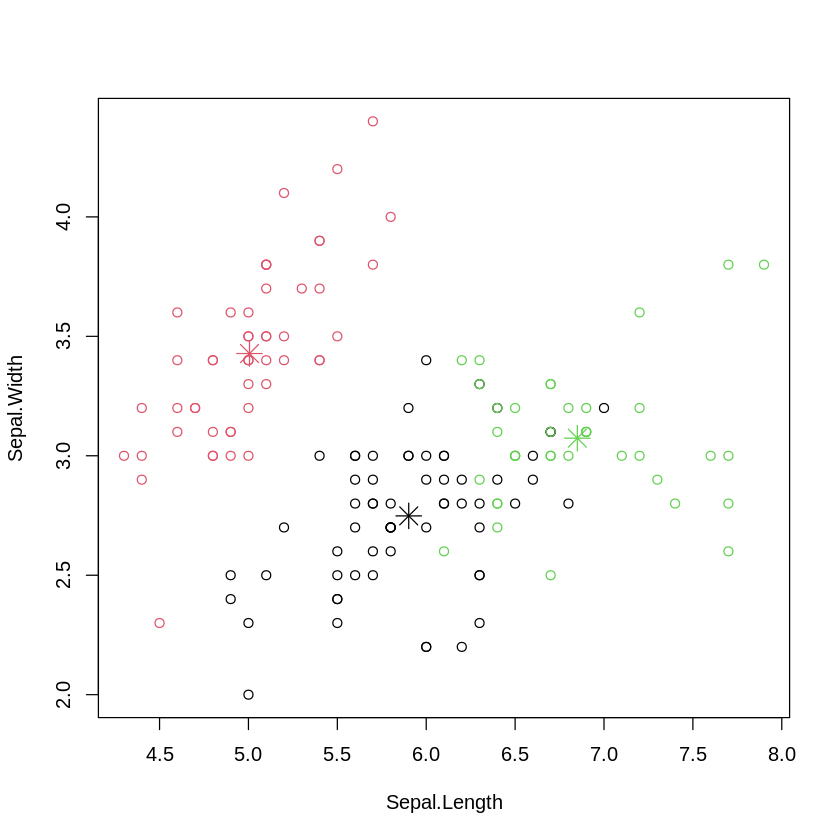

In [ ]:

# Se contrasta la clasificacion real con la definida despues de la clusterizacion
table(iris$Species, kmeans.resultado$cluster)
plot(base[c("Sepal.Length", "Sepal.Width")], col = kmeans.resultado$cluster)
# Se grafica los centros de los clusters 
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col = 1:3, pch = 8, cex=2)




In [ ]:
kmeans.resultado$centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


In [ ]:
library(dplyr)
base %>%
  group_by(cl_kmens) %>%
  summarise(sep_l = mean(Sepal.Length)
            ,sep_w = mean(Sepal.Width)
            ,pet_l = mean(Petal.Length)
            ,pet_w = mean(Petal.Width)
            )


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` ungrouping output (override with `.groups` argument)



cl_kmens,sep_l,sep_w,pet_l,pet_w
<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,5.901613,2.748387,4.393548,1.433871
2,5.006000,3.428000,1.462000,0.246000
3,6.850000,3.073684,5.742105,2.071053


In [ ]:

# Se calcula la distancia entre cada observación y los centroides de los clusters

centroides <- kmeans.resultado$centers[kmeans.resultado$cluster, ]
head(centroides)
distancias <- sqrt(rowSums((base - centroides)^2))
distancias

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246
2,5.006,3.428,1.462,0.246


[1] 3.009322 3.039147 3.034801 3.051560 3.011912 3.081301 3.034537 3.006728
  [9] 3.112558 3.029458 3.044473 3.016690 3.047428 3.141658 3.172446 3.238459
 [17] 3.076364 3.009454 3.116988 3.031108 3.041515 3.023907 3.073437 3.030250
 [25] 3.045196 3.039805 3.013240 3.013705 3.013373 3.033614 3.034339 3.035987
 [33] 3.089986 3.143567 3.026287 3.026354 3.051822 3.016955 3.100777 3.008191
 [41] 3.011713 3.254784 3.079548 3.030778 3.065749 3.044407 3.033878 3.042830
 [49] 3.033153 3.009720 5.052848 4.949127 3.982579 4.955901 4.943029 4.909009
 [57] 4.960878 5.151165 4.959545 4.976459 5.136679 4.912327 4.967831 4.917643
 [65] 4.978695 4.978760 4.918922 4.930810 4.942801 4.953134 4.952678 4.923478
 [73] 4.950463 4.921020 4.931922 4.957626 5.000192 3.941932 4.906545 5.007509
 [81] 4.977172 4.997772 4.933230 4.956259 4.935224 4.949648 4.988502 4.939993
 [89] 4.927898 4.941822 4.925836 4.916528 4.926229 5.140414 4.916757 4.921577
 [97] 4.913738 4.915740 5.175281 4.916626 3.927687 4.975422 3.862149 3.904975
[105] 3.869161 4.015875 5.017259 3.929362 3.905245 3.941331 3.921518 3.922927
[113] 3.858741 4.981610 5.046908 3.910093 3.883621 4.123921 4.142766 4.970752
[121] 3.859423 4.969551 4.067249 4.957561 3.859900 3.885992 4.941332 4.951668
[129] 3.888565 3.895596 3.918833 4.109794 3.890594 4.968967 4.009973 3.966224
[137] 3.919169 3.893299 4.939438 3.865691 3.869637 3.910295 4.975422 3.862422
[145] 3.883553 3.898298 4.983099 3.905042 3.939662 4.972147

In [ ]:

# Se ordenan los registros con mayor distancia a sus respectivos centroides y se toman los top 5

outliers <- order(distancias, decreasing=T)[1:5]

# Cuales son los outliers

print(outliers)
print(base[outliers,])



[1] 99 58 94 61 51
   Sepal.Length Sepal.Width Petal.Length Petal.Width cl_kmens
99          5.1         2.5          3.0         1.1        1
58          4.9         2.4          3.3         1.0        1
94          5.0         2.3          3.3         1.0        1
61          5.0         2.0          3.5         1.0        1
51          7.0         3.2          4.7         1.4        1


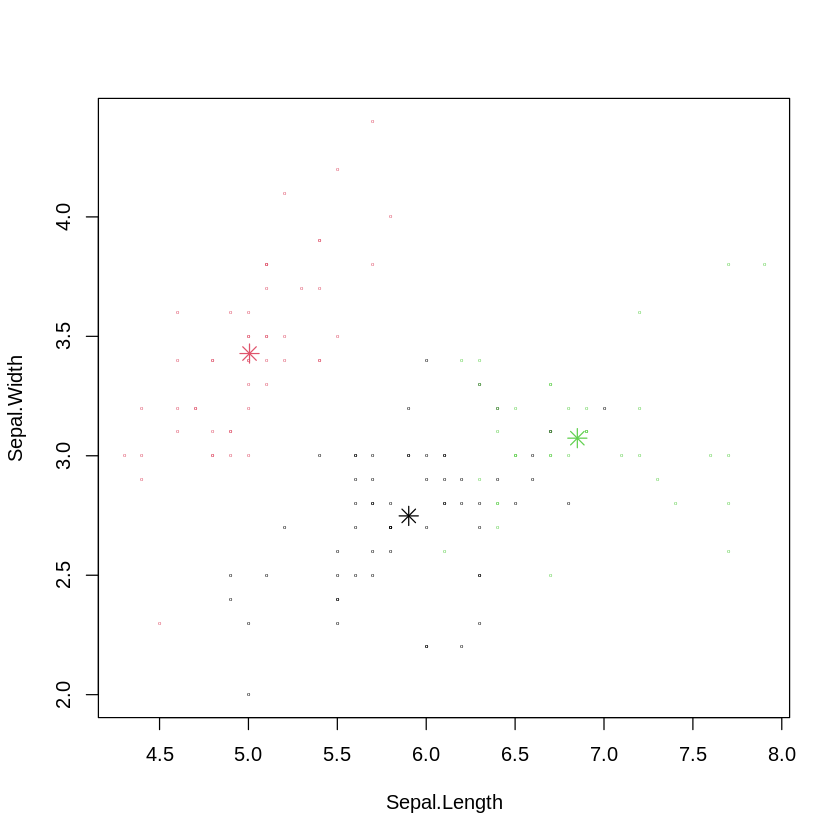

In [ ]:
# Se grafican los clusters
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
#Se marcan los centroides de los clusters
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)




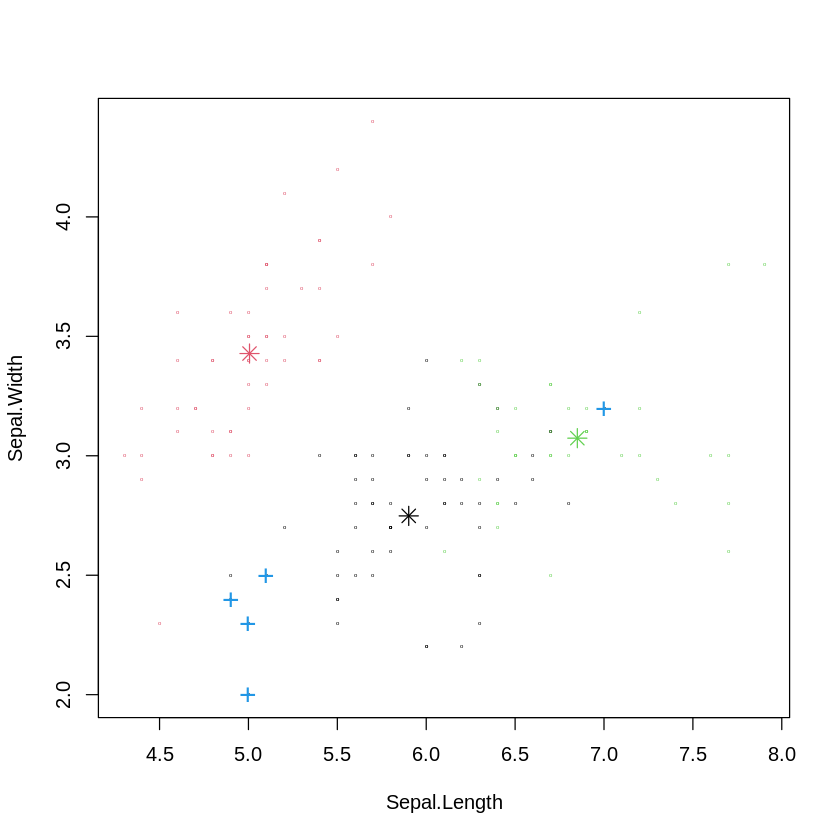

In [ ]:
# Se grafican los outliers
plot(base[,c("Sepal.Length", "Sepal.Width")], pch="o", col=kmeans.resultado$cluster, cex=0.3)
points(kmeans.resultado$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, pch=8, cex=1.5)
points(base[outliers, c("Sepal.Length", "Sepal.Width")], pch="+", col=4, cex=1.5)


 ## Número de clusters

 Una de las opciones más utilizadas es la regla del "codo". Otra manera es estudiando el ancho de "silueta" de cada observación.

In [ ]:
names(base)
base$cl_kmens <- NULL

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"  "cl_kmens"

In [ ]:
names(base)

[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width"

In [ ]:
centros <- 2:50
twss_df <- data.frame()

for(k in centros){
 modelo <- kmeans(base,centers = k,nstart = 10)
 twss <- modelo$tot.withinss
 twss_df<- bind_rows(twss_df, data.frame(K = k, TWSS = twss))

}








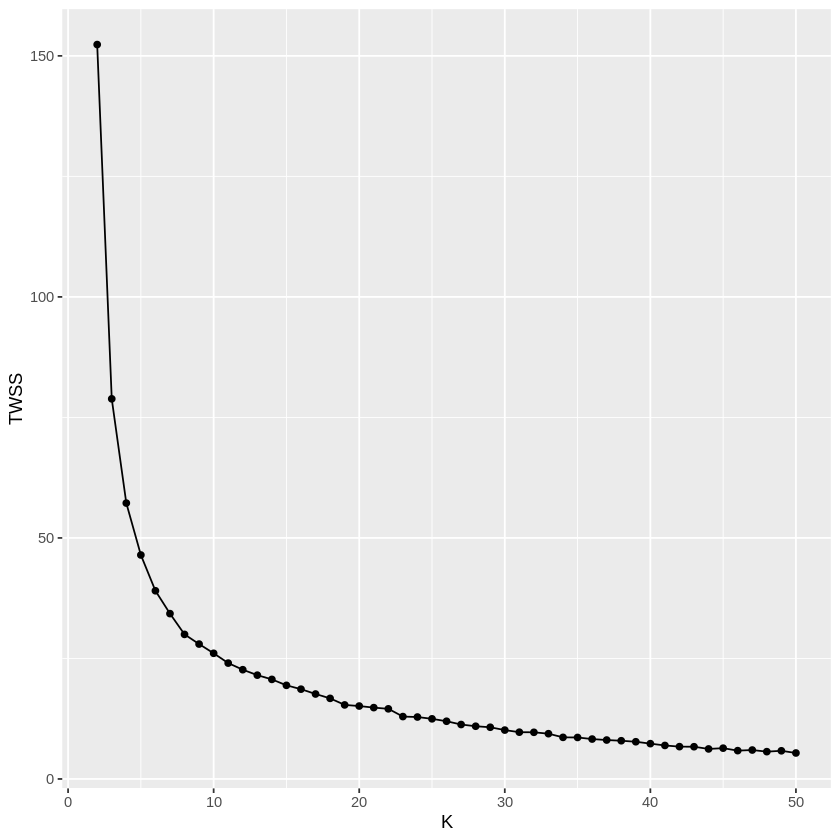

In [ ]:
library(ggplot2)
twss_df %>%
  ggplot() +
  aes(x = K,y = TWSS) +
  geom_point() +
  geom_line()

In [ ]:
modelo_final<- kmeans(base,centers = 4,nstart = 10)

In [ ]:
base$cl_final <- modelo_final$cluster
modelo_final$size

[1] 32 40 28 50

## NOTA: Escalar datos 

In [ ]:
base2 <- base[,-5]


In [ ]:
base2 <- scale(base2)

In [ ]:
base2

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
-0.89767388,1.01560199,-1.335752,-1.3110521
-1.13920048,-0.13153881,-1.335752,-1.3110521
-1.38072709,0.32731751,-1.392399,-1.3110521
-1.50149039,0.09788935,-1.279104,-1.3110521
-1.01843718,1.24503015,-1.335752,-1.3110521
-0.53538397,1.93331463,-1.165809,-1.0486668
-1.50149039,0.78617383,-1.335752,-1.1798595
-1.01843718,0.78617383,-1.279104,-1.3110521
-1.74301699,-0.36096697,-1.335752,-1.3110521
-1.13920048,0.09788935,-1.279104,-1.4422448


In [ ]:
centros <- 2:50
twss_df <- data.frame()

for(k in centros){
 modelo <- kmeans(base2,centers = k,nstart = 10)
 twss <- modelo$tot.withinss
 twss_df<- bind_rows(twss_df, data.frame(K = k, TWSS = twss))

}


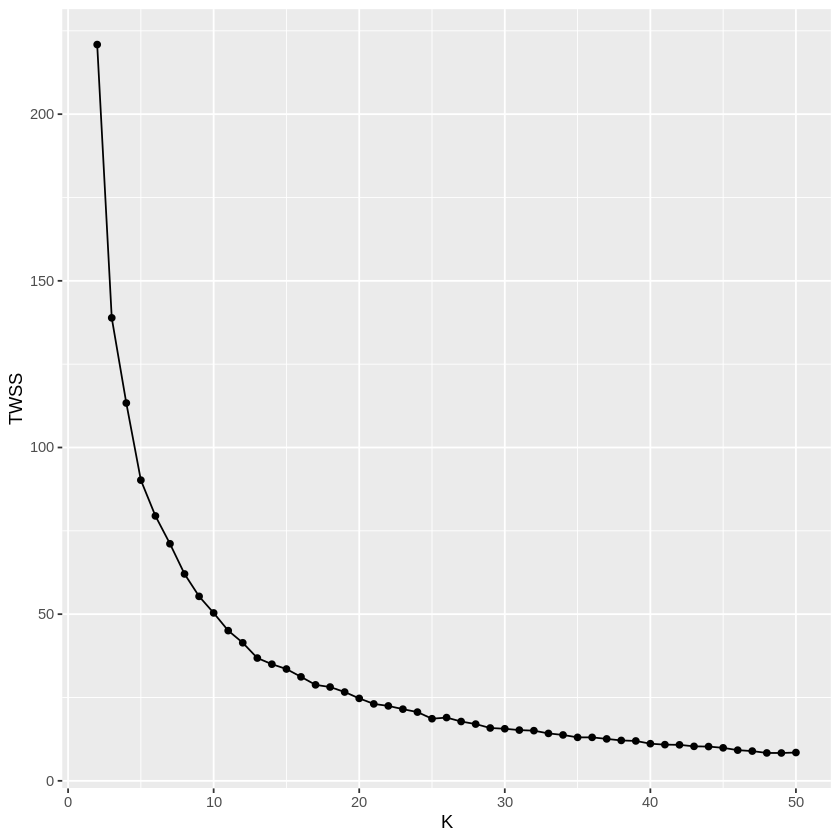

In [ ]:

twss_df %>%
  ggplot() +
  aes(x = K,y = TWSS) +
  geom_point() +
  geom_line()

# Cluster jerárquico


In [ ]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [ ]:
library(ggplot2)
## Clústers  jerárquicos
muestraIris <- iris
muestraIris$Species <- NULL # Eliminamos la especie (ya que en principio no conocemos la agrupación)



In [ ]:
head(muestraIris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4


In [ ]:
df <- data.frame(x = c(0,1,1), y = c(2,2,3))
df

x,y
<dbl>,<dbl>
0,2
1,2
1,3


         1        2        3
1 0.000000 1.000000 1.414214
2 1.000000 0.000000 1.000000
3 1.414214 1.000000 0.000000

[1] 1.414214

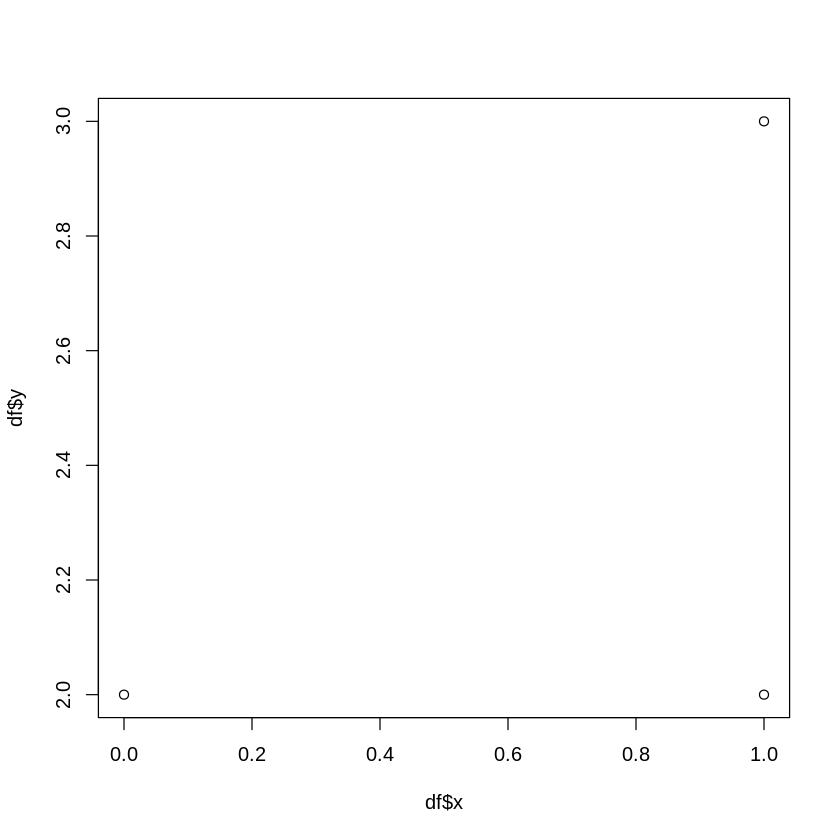

In [ ]:
plot(df$x,df$y)
dist(df,diag = TRUE, upper = TRUE)
sqrt(2)

In [ ]:
?hclust

In [ ]:
## Cluster aglomerativo
# Se genera el cluster aglomerativo con linkage completo.

hc <- hclust(dist(muestraIris), method="average")


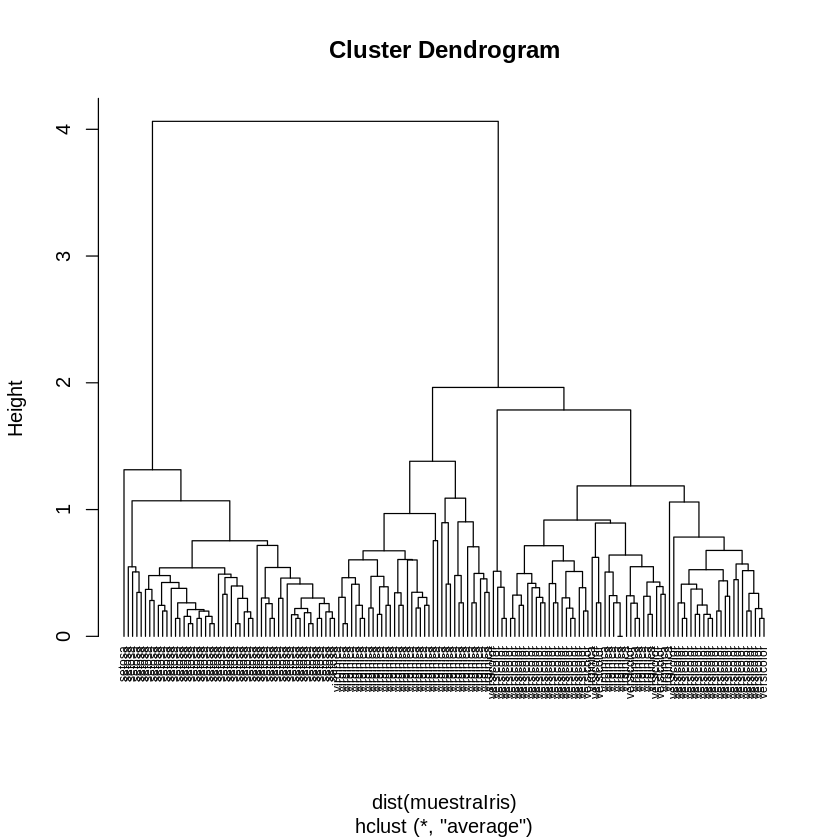

In [ ]:

plot(hc, 
     hang   = -1, #posición inicio dendograma
     labels = iris$Species,
     cex    = .6)



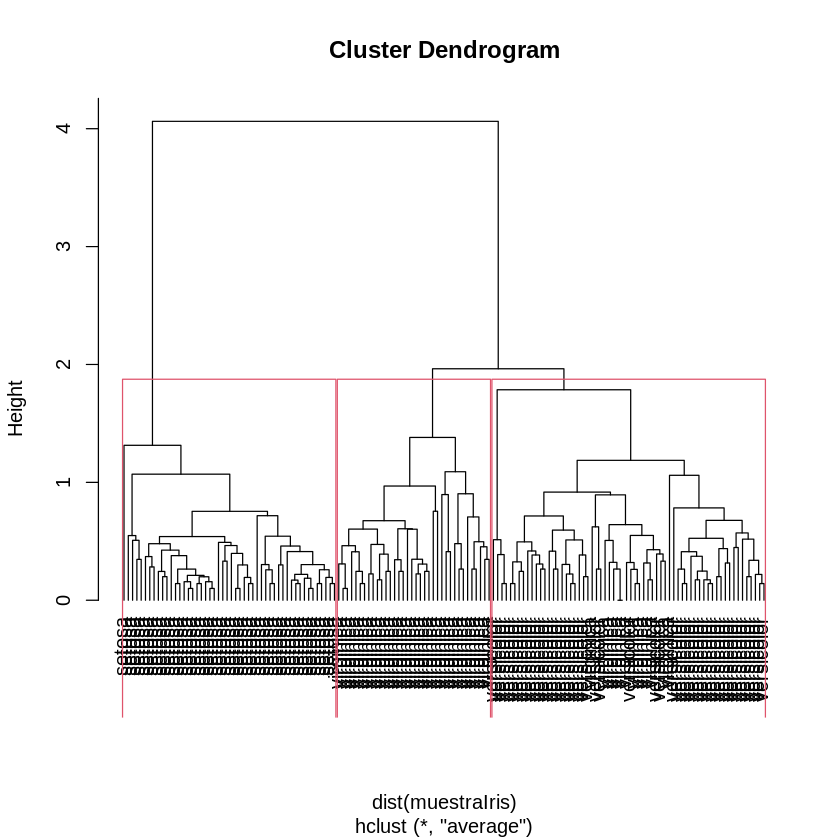

In [ ]:

# Finalmente  se corta el dendograma en K clusters
K <- 3

plot(hc, hang = -1, labels=iris$Species)
rect.hclust(hc, k=K)


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,cluster_hc
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
6,5.4,3.9,1.7,0.4,1


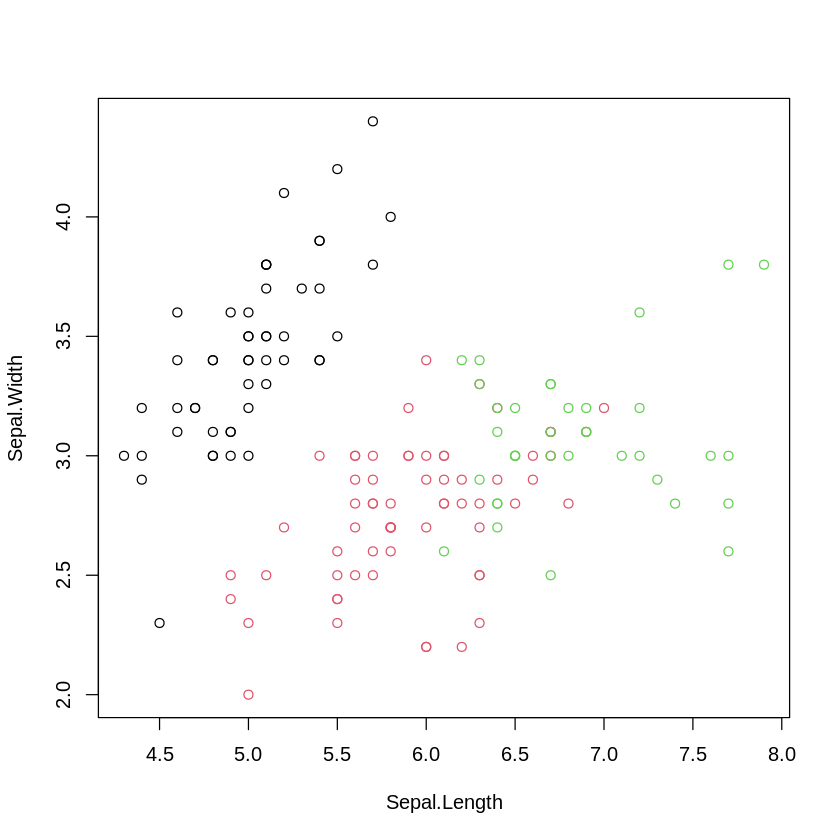

In [ ]:
groups <- cutree(hc, k=K)
muestraIris$cluster_hc <- groups 
plot(iris[,c("Sepal.Length", "Sepal.Width")], col = groups)

head(muestraIris)


In [ ]:
groups

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 2 3 3 3 3
[112] 3 3 2 2 3 3 3 3 2 3 2 3 2 3 3 2 2 3 3 3 3 3 2 3 3 3 3 2 3 3 3 2 3 3 3 2 3
[149] 3 2

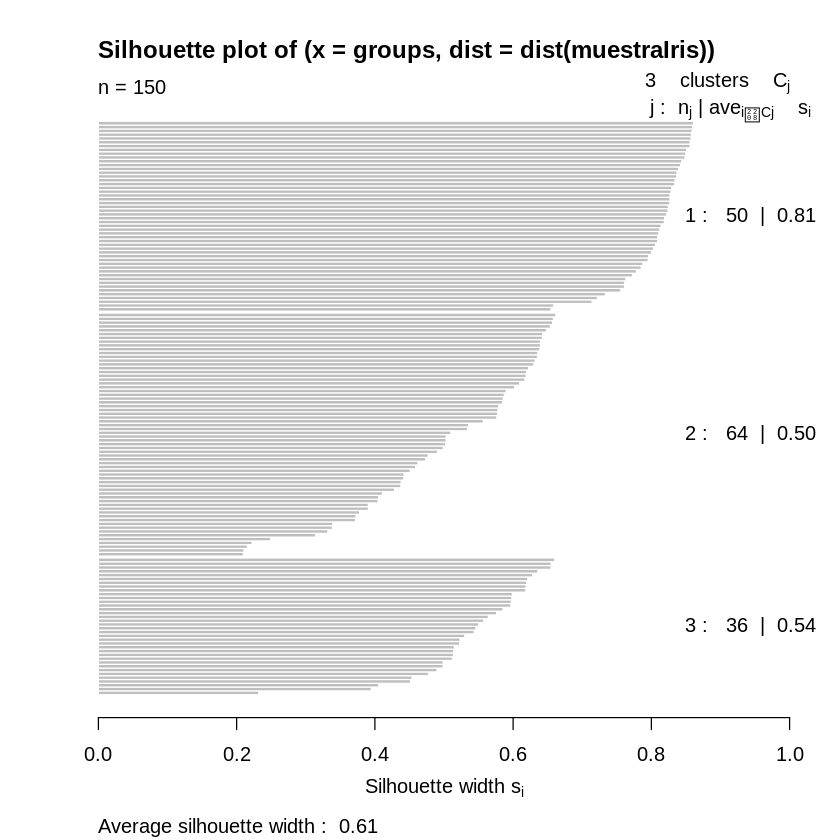

In [ ]:

# gráfico de siluetas  ----------------------------------------------------
plot(cluster::silhouette(groups,dist(muestraIris))) 


In [ ]:

sil <- cluster::silhouette(groups,dist(muestraIris))


str(sil)
mean(sil[,3])

 'silhouette' num [1:150, 1:3] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "cluster" "neighbor" "sil_width"
 - attr(*, "Ordered")= logi FALSE
 - attr(*, "call")= language silhouette.default(x = groups, dist = dist(muestraIris))


[1] 0.6133896

In [ ]:
## Resumen

library(ggplot2)
library(dplyr)
## Clústers  jerárquicos
muestraIris <- iris
muestraIris$Species <- NULL # Eliminamos la especie (ya que en principio no conocemos la agrupación)

hc <- hclust(dist(muestraIris), method="complete")
# si queremos visualizar el dendograma con los cortes requerimos de estas dos lineas

plot(hc, 
     hang   = -1, #posición inicio dendograma
     labels = iris$Species,
     cex    = .6)
rect.hclust(hc, k = 4 )


# ¿cómo decido el K? ¿cuántos clusters generar?
silueta <- cluster::silhouette(groups,dist(muestraIris)) #genera el ancho de silueta para cada obs
## la  silueta de una obs, básicamente indica que tan bien asignada está dicha obs, a su cluster.
## A mayor ancho de silueta, mejor está asignadaa una obs

## podemos calcular el promedio de todos los anchos de silueta y eso nos da un indicador de que tan buena es la agrupación
mean(silueta[,3])
## es el número que se ve abajo en esta visualización
plot(silueta)


## Podemos iterar sobre sitintos valores de K para encontrar el ancho de silueta promedio mayor
df_sil <- data.frame()

for(k in 2:20){# k = 5
  groups <- cutree(hc, k=k)
  
  sil <- cluster::silhouette(groups,dist(muestraIris))
  promedio_siluetas <- mean(sil[,3])
  df_aux <- data.frame(n_cluster = k, sil_prom = promedio_siluetas)
  
  df_sil <- bind_rows(df_sil,df_aux) 
  
}


df_sil %>%
  ggplot() +
  aes(x = n_cluster, y = sil_prom) +
  geom_line()+
  geom_point()

# según el gráfico, k= 2 o k=3 son opciones sugerentes
## Con ello podemos fijar k = 3 grupos
groups_final <- cutree(hc, k = 3 )
muestraIris$cluster_final <- groups_final




## DBSCAN

In [2]:
install.packages("dbscan")

install.packages("mlbench")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
library(dbscan)
library(mlbench)

ERROR: ignored

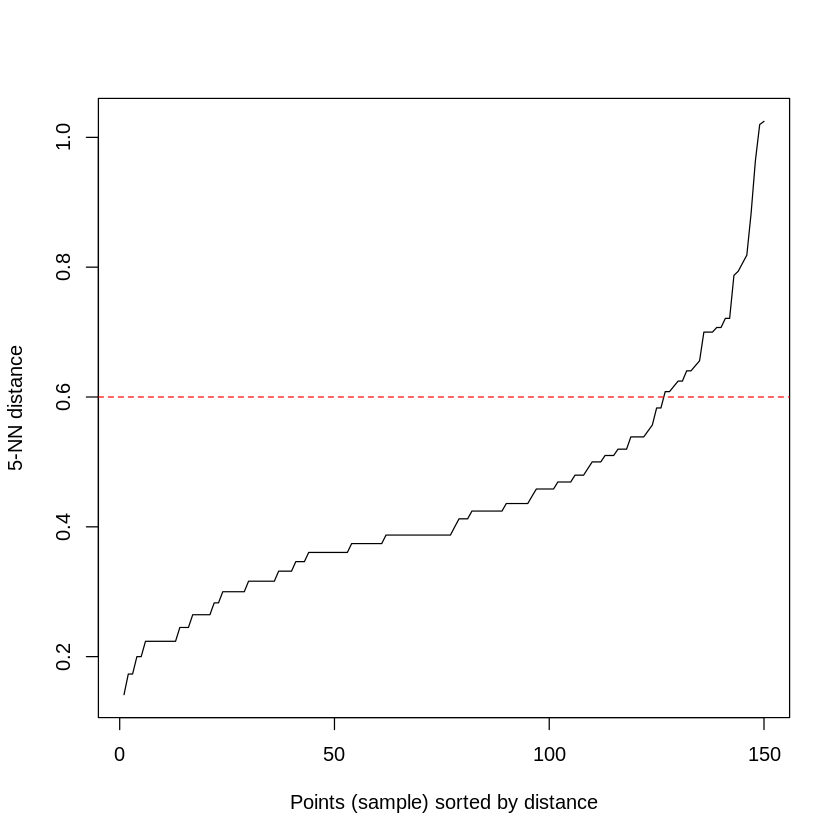

In [ ]:
# iris --------------------------------------------------------------------
data(iris)
iris <- as.matrix(iris[,1:4])

## find suitable eps parameter using a k-NN plot for k = dim + 1
## Look for the knee!

minPts <- 4+1

kNNdistplot(iris, k = minPts)
abline(h =.6, col = "red", lty=2)



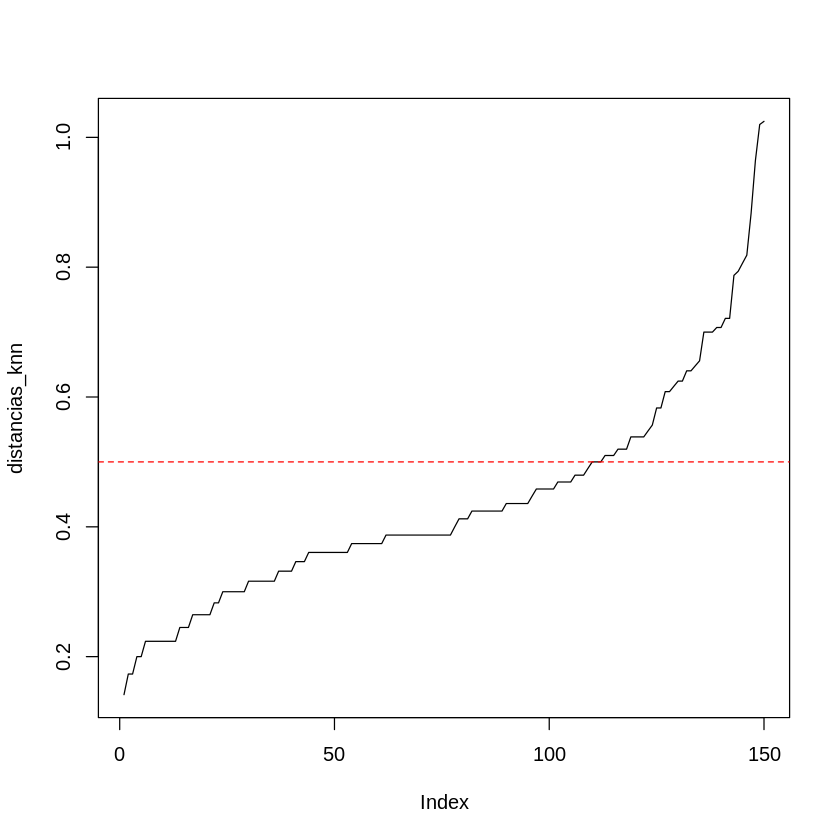

In [ ]:
###### Es lo mismo que 
sort(kNNdist(iris, k = minPts)) -> distancias_knn

plot(distancias_knn,type = "l") #al hacerlo así podemos controlar la ventan de visualización con los parámetros ,xlim y ylim (p ejemplo ,xlim = c(100,150))
abline( h =.5, col = "red", lty=2)
######


In [ ]:
res <- dbscan(iris, eps = .45, minPts = minPts)
res

# puntos con etiqueta 0, son los puntos aislados (ruido)



DBSCAN clustering for 150 objects.
Parameters: eps = 0.45, minPts = 5
The clustering contains 2 cluster(s) and 24 noise points.

 0  1  2 
24 48 78 

Available fields: cluster, eps, minPts

ERROR: ignored

In [ ]:
str(res)

List of 3
 $ cluster: int [1:150] 1 1 1 1 1 1 1 1 1 1 ...
 $ eps    : num 0.6
 $ minPts : num 5
 - attr(*, "class")= chr [1:2] "dbscan_fast" "dbscan"


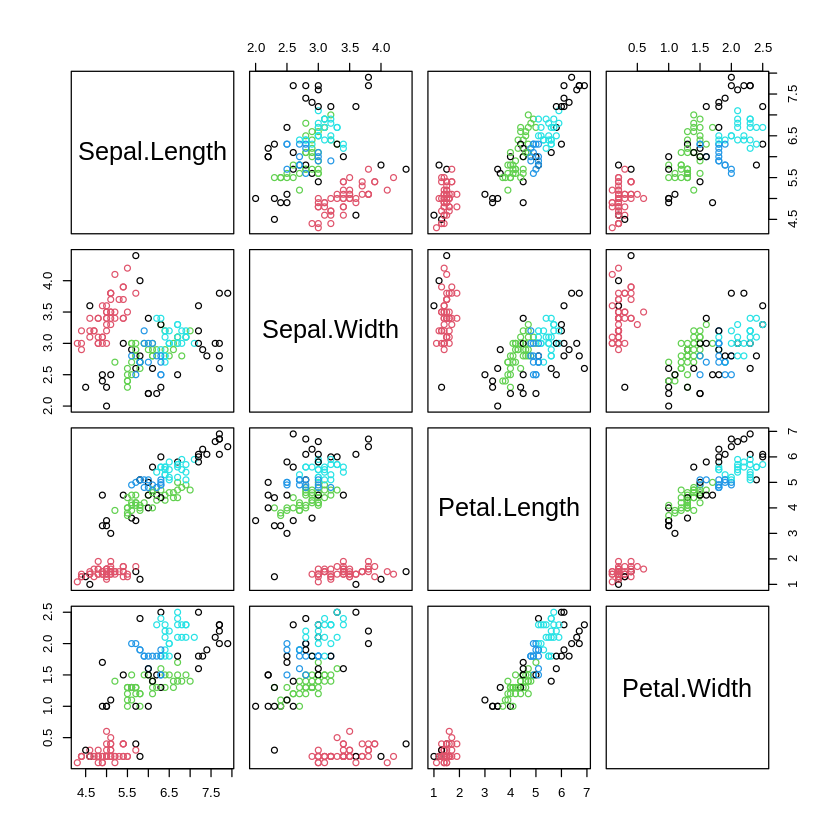

In [ ]:
pairs(iris, col = res$cluster + 1L)

In [ ]:
# espiral -----------------------------------------------------------------
set.seed(666)
spiral <- mlbench.spirals(6000, 1, sd = 0.06)
spiral <- cbind(spiral$x, label = spiral$classes)
colnames(spiral)[c(1, 2)] <- c("x1", "x2")
spiral <- as.data.frame(spiral)
spiral$label <- factor(spiral$label)




ggplot(spiral) + 
  aes(x = x1, y = x2) + 
  geom_point()


In [ ]:
?dbscan

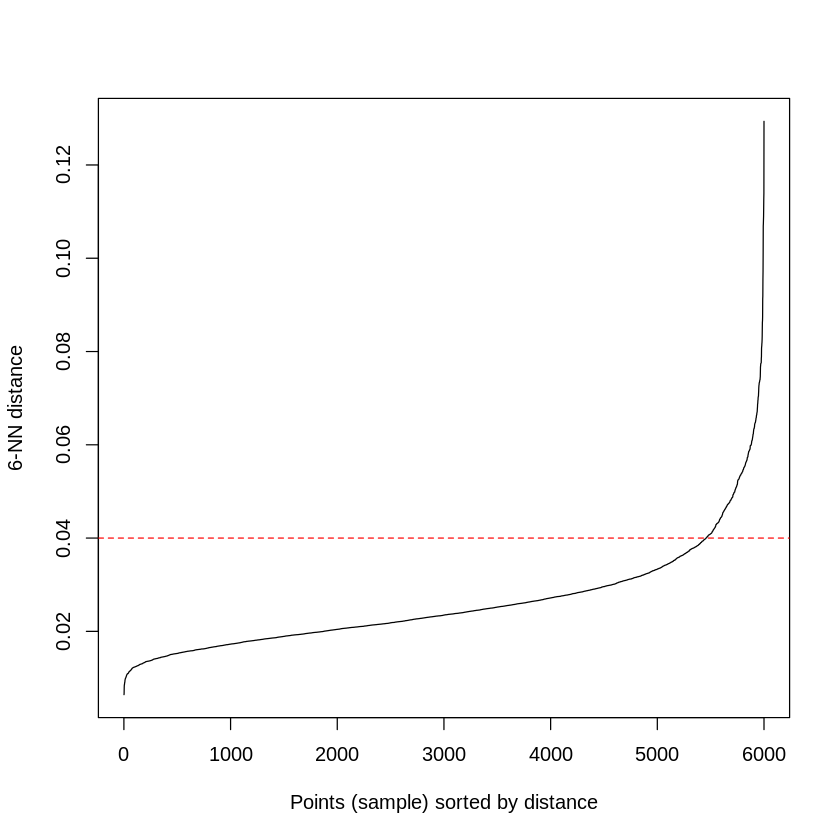

In [ ]:
minPts <- 6

kNNdistplot(spiral[,1:2], k = minPts)
abline(h=.04, col = "red", lty = 2)



In [ ]:
eps <- 0.04

res_spiral <- dbscan(spiral[,1:2], eps = eps, minPts = minPts)
res_spiral




DBSCAN clustering for 6000 objects.
Parameters: eps = 0.04, minPts = 6
The clustering contains 2 cluster(s) and 178 noise points.

   0    1    2 
 178 2893 2929 

Available fields: cluster, eps, minPts

In [ ]:
res_spiral$cluster

spiral2 <- spiral 

spiral2$cl <- res_spiral$cluster #== 0L



[1] 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 2 2 1 1 1 2 2 2 2 1 2 1 1 2 2 1 1 1 2 1 2 0
  [38] 2 1 2 2 1 2 1 2 2 2 2 1 1 1 1 1 2 1 2 2 1 1 1 2 1 2 1 2 2 1 2 1 1 1 1 1 2
  [75] 2 1 2 1 2 2 2 2 1 2 1 1 2 1 1 2 2 2 2 2 1 1 2 1 2 2 1 1 2 1 2 2 2 2 1 2 2
 [112] 2 1 2 1 1 1 1 1 2 2 2 2 1 2 1 2 1 2 2 2 2 2 1 2 1 1 2 2 1 2 2 1 1 2 2 1 2
 [149] 2 2 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 1 2 2 2 1 1 1 1 1 1 2 2 1
 [186] 1 1 2 1 2 1 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 1 2 1 1 1 2 1 2 1 2 2 2 2 2 2 1
 [223] 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 2 2
 [260] 1 1 1 1 2 1 2 1 2 1 2 2 1 1 1 2 1 2 1 2 1 2 1 2 1 2 2 2 1 2 2 1 1 2 2 0 2
 [297] 2 2 2 2 1 2 2 1 2 2 2 1 0 1 2 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2
 [334] 1 2 1 0 1 1 2 1 2 1 2 1 2 2 2 2 2 1 1 2 1 2 2 1 2 2 2 2 2 1 1 2 1 2 1 1 2
 [371] 2 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2
 [408] 1 1 2 2 2 1 1 1 0 1 1 1 1 2 1 1 1 2 1 1 2 2 2 2 1 1 1 2 1 2 1 1 2 1 1 1 1
 [445] 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 1 2 2 0 2 2 1 1 1
 [482] 2 2 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1 2 1 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 2
 [519] 2 2 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 1 2 1 2 2
 [556] 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 1 1 2 1 1 2 2 1 2 1 2
 [593] 1 1 1 2 2 2 2 1 2 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1
 [630] 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 2 1 2 1 1 1 2 1 1 2 2 1 2 1 1 2 1
 [667] 1 1 2 2 1 1 1 1 2 2 2 1 1 1 2 1 2 2 2 2 1 1 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2
 [704] 0 2 1 1 2 2 1 1 2 1 2 1 1 2 2 1 1 1 1 2 1 1 2 1 2 2 1 1 1 2 2 1 1 1 1 1 1
 [741] 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 2 2 2 1 0 2
 [778] 1 1 1 1 2 2 1 2 1 2 2 1 2 2 1 2 2 1 1 2 1 1 2 2 2 1 2 1 1 2 2 1 2 2 1 1 1
 [815] 1 1 2 2 1 2 1 2 1 1 2 1 2 2 2 2 0 1 1 2 1 1 2 2 2 2 1 1 1 2 1 2 2 1 1 2 1
 [852] 1 2 2 1 2 2 1 1 1 2 0 2 2 1 2 2 2 2 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 2 1 2 2
 [889] 2 2 1 2 1 1 1 2 2 2 2 2 2 2 0 1 1 1 1 2 0 1 2 1 1 2 2 2 2 1 1 1 2 1 1 2 2
 [926] 1 2 2 2 2 2 1 2 1 2 2 2 2 0 1 2 2 2 2 1 1 2 1 1 1 2 2 2 2 1 1 2 2 1 1 2 2
 [963] 1 2 2 2 1 1 1 1 1 2 2 1 2 2 1 1 1 1 1 1 2 0 1 2 2 1 1 2 2 1 2 1 1 1 2 2 1
[1000] 1 1 1 1 2 1 2 0 2 2 2 2 1 2 2 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1
[1037] 2 2 2 1 2 1 1 2 1 2 1 2 2 2 2 1 2 2 2 2 1 2 1 1 1 2 2 2 2 2 2 1 2 1 1 1 2
[1074] 2 1 1 2 2 2 2 2 2 2 2 2 1 2 2 1 1 2 1 1 2 1 1 1 1 2 1 2 2 1 1 1 2 2 2 2 2
[1111] 1 1 2 1 1 2 2 1 1 1 1 1 1 2 2 1 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 0 1 2 1 2
[1148] 1 1 1 2 2 1 1 2 2 0 2 2 2 1 2 2 1 1 1 1 2 2 2 2 2 1 0 2 1 1 1 1 1 1 2 1 2
[1185] 2 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 2 1 2 1 2 1 0 2 1 2 1 2 1 1 1 1 2 1 1 1 2
[1222] 2 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 2 2 0 1 2 2 2 2 1 2 1 2 1 1 1 1 2 2 1 1 2
[1259] 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 1 2 2 2
[1296] 2 2 2 1 1 1 1 2 1 2 2 2 1 2 2 1 2 1 1 1 2 2 2 1 2 2 1 2 1 1 2 1 1 0 0 1 2
[1333] 1 2 2 1 2 2 1 1 1 1 1 1 2 2 1 2 1 2 2 2 0 1 1 1 2 2 1 2 2 1 0 2 1 2 1 2 2
[1370] 1 0 1 2 2 2 2 1 1 1 2 1 2 2 2 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 2
[1407] 2 2 1 2 2 1 1 2 1 2 2 0 1 2 2 2 1 2 1 1 1 2 1 2 1 1 2 2 2 1 0 1 2 1 2 2 2
[1444] 2 2 1 1 2 2 2 2 2 2 1 2 0 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 2 2
[1481] 2 2 2 1 1 1 1 1 2 2 1 2 2 1 1 1 0 1 2 2 2 1 1 1 2 2 2 1 2 1 2 1 2 2 1 2 1
[1518] 2 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1 2 2 2 0 1 2 2 1 1 2 2 1 2 1 1 0 1 1 1
[1555] 2 2 2 2 1 2 1 2 1 2 1 1 1 2 1 2 1 2 1 2 1 1 2 0 2 2 1 1 1 2 1 2 1 2 1 1 2
[1592] 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 2 1 2 1 1
[1629] 1 2 2 2 1 1 2 1 1 1 2 2 2 2 1 1 1 2 2 2 2 1 1 1 2 1 2 1 2 2 2 1 2 1 2 1 0
[1666] 1 2 1 2 1 1 2 1 2 1 1 1 2 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 1
[1703] 1 1 1 2 2 1 1 1 2 2 1 2 2 2 1 1 1 2 1 1 2 2 1 2 1 2 1 1 2 1 2 2 1 2 2 1 2
[1740] 1 2 1 2 1 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 1 0 2 1 1 2 1 2 1 2 2 1 2 1 2 2
[1777] 1 1 1 1 1 2 2 1 1 1 1 2 1 1 2 1 1 2 1 1 0 2 2 2 2 1 2 1 2 1 1 1 1 2 2 2 1
[1814] 1 2 1 1 0 1 1 1 0 2 0 2 2 2

In [ ]:
head(spiral2)

,x1,x2,label,cl
,<dbl>,<dbl>,<fct>,<int>
1,0.3238151,0.003029740,1,1
2,0.7173192,-0.156244303,2,2
3,0.3514615,-0.004956196,1,1
4,0.3528370,-0.004573674,1,1
5,0.4011130,-0.018760248,1,1
6,0.3622997,-0.005858990,1,1


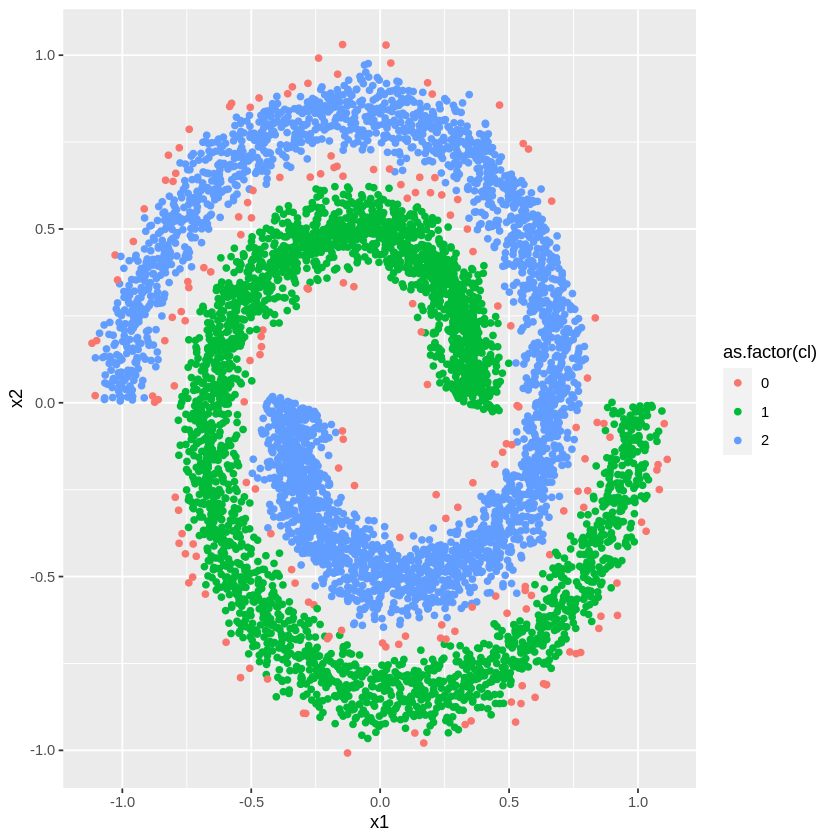

In [ ]:

ggplot(spiral2) + 
  aes(x = x1, y = x2, color = as.factor(cl) ) + 
  geom_point()

## OPTICS

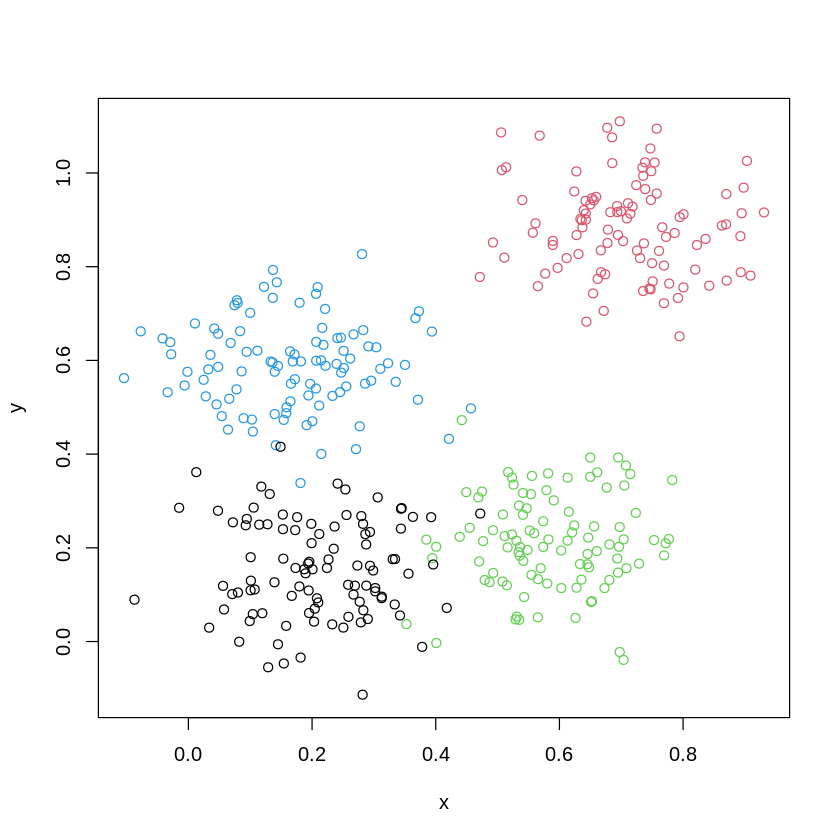

In [ ]:
set.seed(2)
n <- 400

x <- cbind(
  x = runif(4, 0, 1) + rnorm(n, sd=0.1),
  y = runif(4, 0, 1) + rnorm(n, sd=0.1)
)

plot(x, col=rep(1:4, time = 100))


In [ ]:

### run OPTICS (Note: we use the default eps calculation)
res <- optics(x, minPts = 5)
res




OPTICS ordering/clustering for 400 objects.
Parameters: minPts = 5, eps = 0.167960233237437, eps_cl = NA, xi = NA
Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi

[1]   1 363  89 133  21  13 165  59  35 191 137 193 329 209 149  17   5 169
 [19] 349 337 121  57 333 285 281 241 153 293 253 177 357 321 257 105  77  29
 [37] 145  25 301 229 389 305 397 273 245 237 369  73 385 393 377 317 185 117
 [55] 181 101   9 249 381 205 345 313 261 225 213  69 289 173 221  61 309 157
 [73]  81 365  49  97 217  53 341  33 189 297  83 161 125 277  85 141  93 197
 [91] 109  41 373  45  37 203 231 379 351 375 227 299  11 235 311 147 271 399
[109]  71  23 275 323 291 219  47 223   3 303 347 131 343 207 151 143  43  31
[127] 391 287 283 215 115 111 183  63 295 199  55 263 175 367 331 171  87 247
[145] 319  51 251 359  99 201  91 339  67 243  27  79 119 123 327 267 159 179
[163]  95 279 211   7 255 139 371 355 187 103 395 107 239 195  39 155 335 135
[181]  15 315 387 259 383 167 129   4 113 265 127  65 224 361 208 260 288 256
[199] 232   8 100 348  72  28 368 336 280 392  76 304 356 220 124  56 156  88
[217] 388 332 188 168 136 184 120 268  96 292 252 108  32  16 244 236 340 372
[235] 116 172 144 112 324  52 360 352 284  84 380 148 180 152  20 216 384 308
[253] 176 164  68  64 196 364 160  12 272 200 264  36 212 128  92  80  48 132
[271]  40 192 316 300 204 140 344 248 328  60 312 296  24 276  19 353 400 320
[289] 228 163 240  44 104 233 376 396 307  75  14 262 166 138 182 198 374 298
[307] 174  34  26 282 210 362 310 122  98 118 318 386 358 330  46 278 142  62
[325] 114   6 286 394 342 290 314 194 158 246 190  38 294 322 242 202 130 266
[343] 186 162  30 338 170 126 254 378 214  70  18  10 226 350   2 382 346 306
[361] 366 354 102  74 234 146 134 206  78 250  86  66 334  94 150  82 390 274
[379] 222  58  42 370 218 178  22  90 326  50 258 238 106 270 110 302 230 398
[397] 154  54 325 269

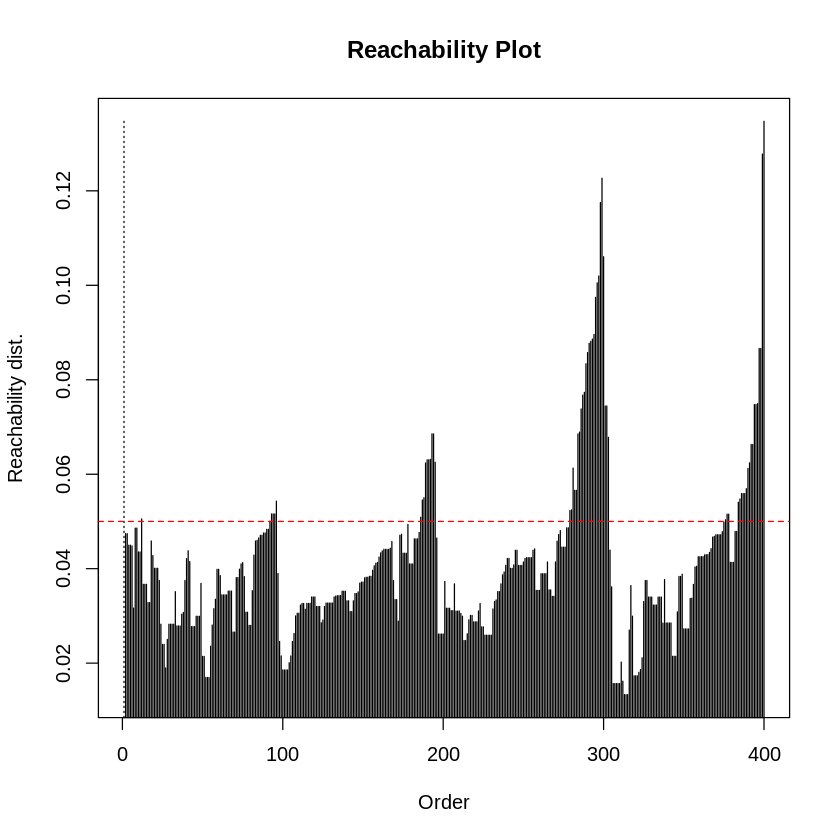

In [ ]:
### get order
res$order

### plot produces a reachability plot
plot(res)
abline(h = .05, col = "red", lty = 2)




In [ ]:

### extract a DBSCAN clustering by cutting the reachability plot at eps_cl
res2 <- extractDBSCAN(res, eps_cl = .054)
res2



OPTICS ordering/clustering for 400 objects.
Parameters: minPts = 5, eps = 0.167960233237437, eps_cl = 0.054, xi = NA
The clustering contains 4 cluster(s) and 47 noise points.

 0  1  2  3  4 
47 95 91 86 81 

Available fields: order, reachdist, coredist, predecessor, minPts, eps,
                  eps_cl, xi, cluster

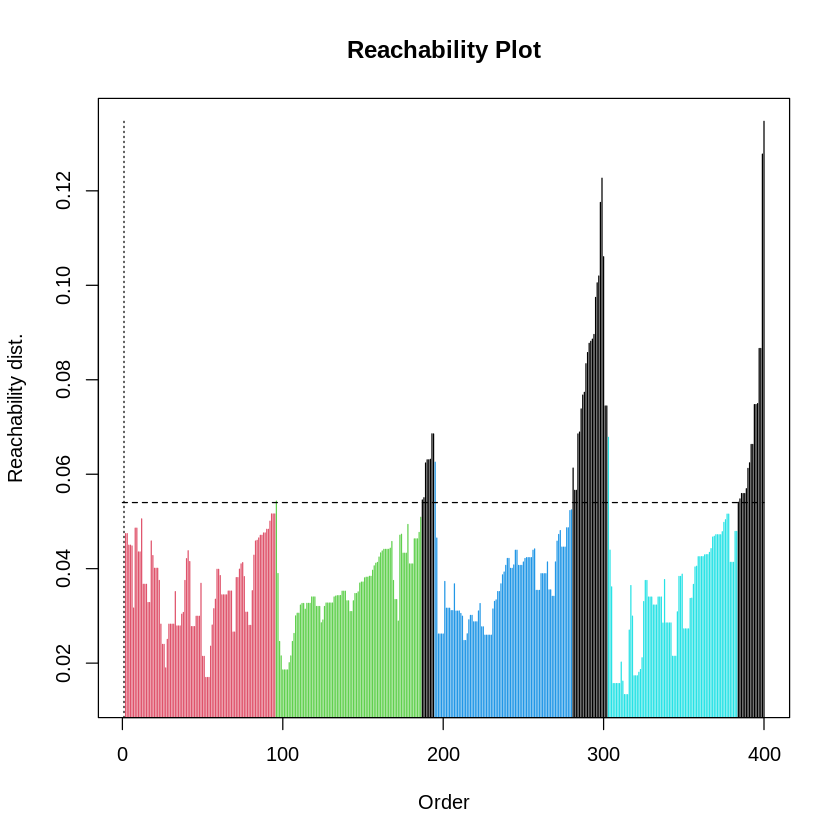

In [ ]:
plot(res2)  ## black is noise


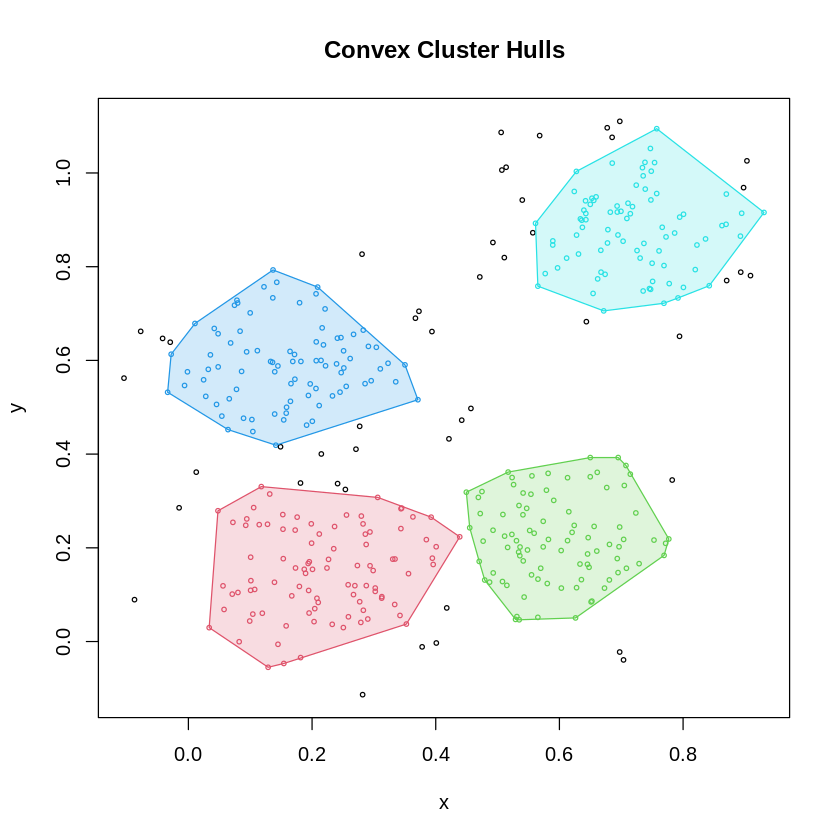

In [ ]:
hullplot(x, res2)




In [ ]:

x_df <- x %>%
  as.data.frame() 

x_df$cl <- as.factor(res2$cluster)

library(ggplot2)

ggplot(x_df) +
  aes(x = x, y = y, col = cl) +
  geom_point()
